# Victor Manuel Gómez Espinosa

In [7]:
#librerias
import numpy as np
import pandas as pd
from microtc.textmodel import TextModel
from sklearn.decomposition import KernelPCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Datos

In [9]:
df=pd.read_csv('results.csv', index_col=0)
df.head()

,tweets,banks,sentiment,topics
0,"@BancoAzteca Buenas noches, acabo de salir de ...",azteca,NEU,productos
1,@BancoAzteca mi solicitud ya fue realizada la ...,azteca,NEU,productos
2,RT @LideresMexicano: Este 5 de octubre a las 2...,azteca,NEU,seguridad
3,RT @killer_queenbb: Mi día va genial \n@Facebo...,azteca,P,productos
4,Este 5 de octubre a las 20:30hrs lanzamos el p...,azteca,NEU,seguridad


In [59]:
neg_dat=df[df.sentiment=='N']

In [63]:
nct=pd.crosstab(neg_dat.banks,neg_dat.topics)
nct

topics,atn_cliente,digital,productos,seguridad,sucursal
banks,,,,,
azteca,14,106,48,32,7
banorte,49,148,81,35,13
bbva,29,263,97,32,5
citibanamex,70,161,146,49,22
hsbc,41,145,122,57,19
inbursa,7,44,25,21,4
santander,67,124,90,54,30
scotiabank,31,71,74,23,5


In [64]:
import prince

In [65]:
ca=prince.CA(n_components=2,check_input=True,engine='auto',random_state=42)
ca=ca.fit(nct)

In [91]:
y=ca.row_coordinates(nct) #bancos
y.to_csv('rows_topics.csv')


In [92]:
z=ca.column_coordinates(nct) #topicos
z.to_csv('columns_topics.csv')

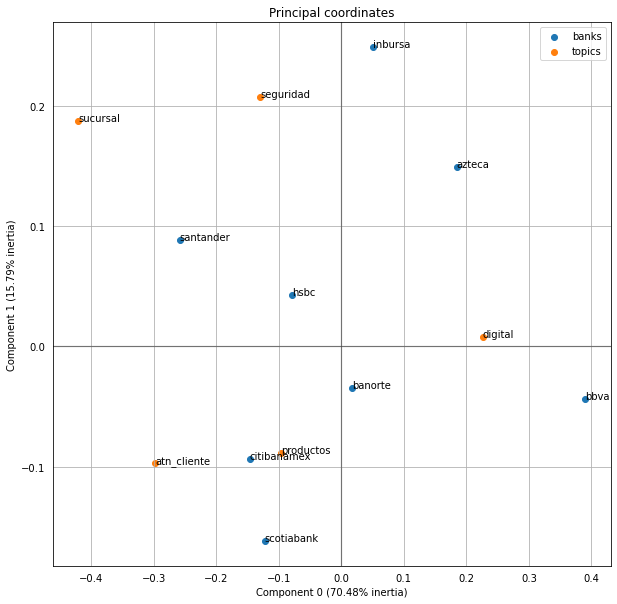

In [68]:
ax=ca.plot_coordinates(X=nct, figsize=(10,10), x_component=0, y_component=1, show_row_labels=True, show_col_labels=True)


eje horizontal hacia la derecha digital, izquierda sucursal.
eje vertical: productos y atencion al cliente hacia abajo, arriba seguridad.

bbva quejas digital y atn cliente y productos

In [70]:
ca.total_inertia_ 

0.064339900955385

In [73]:
from scipy import stats
def escala(x): #puntuaciones
    y=(x-min(x))*10/(max(x)-min(x))
    return(y)

def independenciaCA(df,alpha=0.05): #independencia entre filas y columnas (True)
    I,J=df.shape
    fisher_tab=df.values
    n=np.sum(fisher_tab)
    P=fisher_tab/n
    r = np.sum(P,1)
    c = np.sum(P,0)
    
    vc=stats.chi2.ppf(1-alpha, (I-1)*(J-1))
    ren=0
    for i in range(I):
        col=0
        for j in range(J):
            col=col+(((P[i,j]/r[i])-c[j])**2)*(1/c[j])
        ren=ren+r[i]*col

    vt=n*ren
    return(vt<=vc,(vt,vc))

In [74]:
independenciaCA(nct) #False, el tipo de quejas depende del tipo de banco

(False, (158.34049625120244, 41.33713815142739))

In [77]:
topicos=z.values
topicos=topicos[:,0]
topicos=escala(topicos)
topicos

array([ 1.91273581, 10.        ,  5.02361199,  4.49670087,  0.        ])

In [78]:
bancos=y.values
bancos=bancos[:,0]
bancos=escala(bancos)
bancos

array([ 6.83393577,  4.24713653, 10.        ,  1.73103293,  2.77258107,
        4.75847196,  0.        ,  2.10006579])

In [82]:
bnks=nct.index
scores=bancos

quejas=pd.DataFrame({'banks':bnks,
                    'scores': scores})

quejas.sort_values(by=['scores'], ascending=False).head(10)

,banks,scores
2,bbva,10.000000
0,azteca,6.833936
5,inbursa,4.758472
1,banorte,4.247137
4,hsbc,2.772581
7,scotiabank,2.100066
3,citibanamex,1.731033
6,santander,0.000000


In [83]:
bnks=nct.columns
scores=topicos

quejas=pd.DataFrame({'banks':bnks,
                    'scores': scores})

quejas.sort_values(by=['scores'], ascending=False).head(10)

,banks,scores
1,digital,10.000000
2,productos,5.023612
3,seguridad,4.496701
0,atn_cliente,1.912736
4,sucursal,0.000000


In [84]:
stm=pd.crosstab(mds_dataset.banks,mds_dataset.sentiment)
stm

sentiment,N,NEU,P
banks,,,
azteca,207,576,88
banorte,326,618,87
bbva,426,801,91
citibanamex,448,662,77
hsbc,384,536,68
inbursa,101,183,12
santander,365,631,48
scotiabank,204,333,35


In [85]:
ca2=prince.CA(n_components=2,check_input=True,engine='auto',random_state=42)
ca2=ca2.fit(stm)

In [93]:
y2=ca2.row_coordinates(stm) #bancos
y2.to_csv('rows_sentiment.csv')

In [94]:
z2=ca2.column_coordinates(stm) #topicos
z2.to_csv('columns_sentiment.csv')

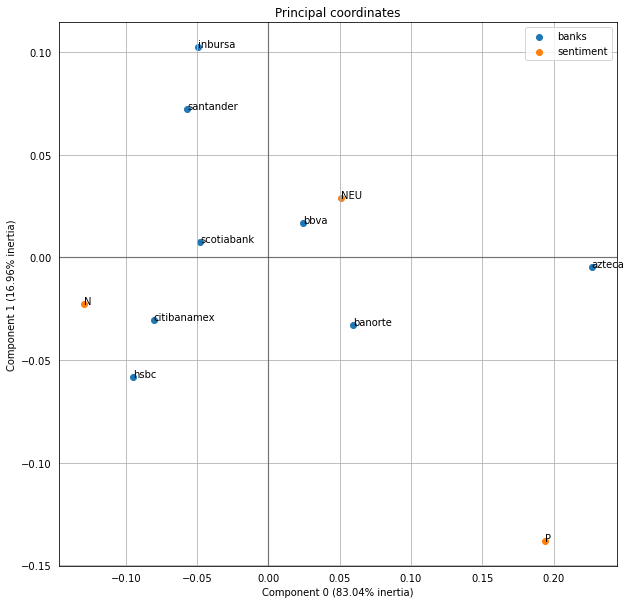

In [89]:
ax=ca2.plot_coordinates(X=stm, figsize=(10,10), x_component=0, y_component=1, show_row_labels=True, show_col_labels=True)


Analisis de correspondencia (CA)

eje horizontal a la derecha sentimiento positivo, izquierda sentimiento negativo.

bbva mas cargado al sentimiento neutro.

In [90]:
independenciaCA(stm) #False, el tipo de sentimiento depende del tipo de banco

(False, (85.78968331508673, 23.684791304840576))